<h3><b>Implementing linear regression using only numpy:</b></h3>

In [9]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression

In [10]:
def cost_function(X, Y, W, b):
    '''
    X = the training dataset (m, n)
    Y = the prediction (m, 1)
    W = weights (n, 1)
    b = bias (1,)
    '''
    m = X.shape[0]
    f_x = np.dot(X, W) + b
    loss = f_x - Y
    loss_sq = np.sum(loss**2)
    cost = loss_sq/(2*m)
    
    return cost

Our goal is to minimize the squared error cost as computed above. For this, we implement the gradient descent algorithm.

In [11]:
def derivatives(X, Y, W, b):
    m = X.shape[0]
    f_x = np.dot(X, W) + b
    loss = f_x - Y
    
    dj_db = np.sum(loss) * (1/m)
    dj_dw = (1/m) * np.dot(X.T, loss)
    
    return dj_dw, dj_db

In [12]:
def gradient_descent(X, Y, W, b, iterations = 10000, alpha = 1e-3):
    cost_history = []
    
    for i in range(iterations):
        dj_dw, dj_db = derivatives(X, Y, W, b)
        W = W - alpha*dj_dw
        b = b - alpha*dj_db
        
        if(i%1000 == 0):
            cost = cost_function(X, Y, W, b)
            print(f"Cost at iteration {i} = {cost}")
            cost_history.append(cost)
    
    return W, b, cost_history

In [13]:
X, Y = make_regression(n_samples = 1500, n_features = 5, noise = 8, random_state = 11)

feature_names = [f"feature{i+1}" for i in range(X.shape[1])]
X_df = pd.DataFrame(X, columns=feature_names)
w = np.zeros(X_df.shape[1])

W_final, b_final, cost_history = gradient_descent(X_df, Y, w, 0, 100000)

print("The trained model gives parameters:")
print("W: ", W_final)
print("b: ", b_final)

Cost at iteration 0 = 11010.734761798363
Cost at iteration 1000 = 1406.0768016989439
Cost at iteration 2000 = 204.16077975815466
Cost at iteration 3000 = 53.215365916823345
Cost at iteration 4000 = 34.18598612684518
Cost at iteration 5000 = 31.776978166703984
Cost at iteration 6000 = 31.470597402406447
Cost at iteration 7000 = 31.431427594712975
Cost at iteration 8000 = 31.42638997722395
Cost at iteration 9000 = 31.425737656973837
Cost at iteration 10000 = 31.425652524769383
Cost at iteration 11000 = 31.425641314737515
Cost at iteration 12000 = 31.425639823621605
Cost at iteration 13000 = 31.425639623026044
Cost at iteration 14000 = 31.425639595703718
Cost at iteration 15000 = 31.425639591932256
Cost at iteration 16000 = 31.425639591404305
Cost at iteration 17000 = 31.42563959132933
Cost at iteration 18000 = 31.425639591318536
Cost at iteration 19000 = 31.425639591316955
Cost at iteration 20000 = 31.425639591316713
Cost at iteration 21000 = 31.425639591316678
Cost at iteration 22000 = 

Plotting the data:

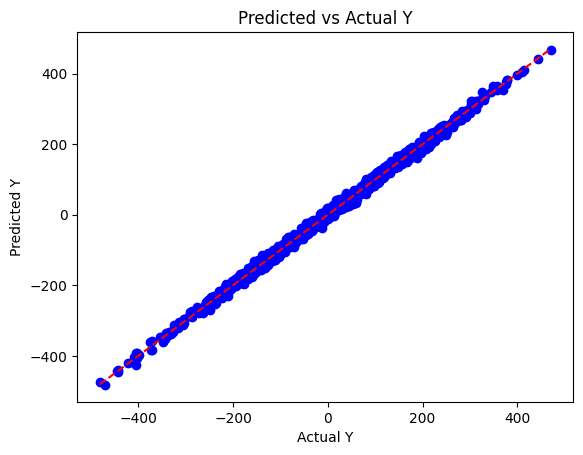

In [15]:
import matplotlib.pyplot as plt

X_np = X_df.to_numpy()
y_pred = np.dot(X_np, W_final) + b_final

plt.scatter(Y, y_pred, color = "blue")
plt.xlabel("Actual Y")
plt.ylabel("Predicted Y")
plt.title("Predicted vs Actual Y")
plt.plot([Y.min(), Y.max()],[Y.min(), Y.max()], 'r--') 
plt.show()

Thus, the model can perform linear regression pretty accurately.